In [ ]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 불러오기
# EUC-KR : 대표적인 한글 완성형 인코딩
train = pd.read_csv('/content/drive/MyDrive/colab/data/train.csv', encoding='EUC-KR')
test = pd.read_csv('/content/drive/MyDrive/colab/data/test.csv', encoding='EUC-KR')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [ ]:
train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [ ]:
y_train = train['target']

In [ ]:
y_train=pd.DataFrame(y_train)

In [ ]:
y_train

,target
0,0
1,1
2,1
3,1
4,1
...,...
9995,1
9996,1
9997,1
9998,1


In [ ]:
ID = test['user_id']

In [ ]:
x_train = train.iloc[:, :14]

In [ ]:
# 범주형 컬럼
x_train['subscription_type'].unique()
x_train['preferred_difficulty_level'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [ ]:
# train 라벨인코딩
x_train['preferred_difficulty_level']=x_train['preferred_difficulty_level'].map({'Low':1,'Medium':2,'High':3})
x_train['subscription_type'] = x_train['subscription_type'].map({'Basic':1, 'Premium':2})

# test 라벨인코딩
test['preferred_difficulty_level']=test['preferred_difficulty_level'].map({'Low':1,'Medium':2,'High':3})
test['subscription_type'] = test['subscription_type'].map({'Basic':1, 'Premium':2})

In [ ]:
x_train.head()

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,1,1,4,5
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,2,1,1,6
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,2,2,0,7
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,1,1,1,0
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,2,1,3,0


In [ ]:
# 정규화 스케일링 진행
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
model = MinMaxScaler()

In [ ]:
col = x_train[['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']]
model.fit(col)

MinMaxScaler()

In [ ]:
scaled = model.transform(x_train[['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']])

In [ ]:
scaled_df = pd.DataFrame(scaled, columns=[['average_login_time', 'average_time_per_learning_session', 'recent_learning_achievement']])

In [ ]:
x_train['average_login_time'] = scaled_df['average_login_time']
x_train['average_time_per_learning_session'] = scaled_df['average_time_per_learning_session']
x_train['recent_learning_achievement'] = scaled_df['recent_learning_achievement']

In [ ]:
# user_id drop
x_train = x_train.drop(columns=['user_id'])

In [ ]:
# 잘 반영되었는지 확인
x_train.head()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
0,13,14,0.510710,0.016719,18,16,0.422657,3,4,1,1,4,5
1,16,18,0.653087,0.144299,16,13,0.803441,2,3,2,1,1,6
2,22,1,0.561419,0.043235,13,14,0.761609,3,4,2,2,0,7
3,1,19,0.619612,0.084726,19,18,0.446031,0,3,1,1,1,0
4,4,5,0.772338,0.061055,19,10,0.599412,2,4,2,1,3,0


In [ ]:
x_train.corr()

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
subscription_duration,1.000000,0.014754,-0.000031,0.006324,0.002193,-0.001662,0.007875,0.014414,0.002114,-0.016938,-0.002887,-0.005174,-0.003704
recent_login_time,0.014754,1.000000,-0.006113,-0.004650,-0.015338,-0.000142,0.005768,-0.015882,-0.005486,0.008860,-0.018172,0.011653,0.008737
average_login_time,-0.000031,-0.006113,1.000000,-0.007382,0.002294,-0.012416,-0.005967,0.013661,0.003129,-0.008765,0.008284,0.009768,0.012508
average_time_per_learning_session,0.006324,-0.004650,-0.007382,1.000000,-0.001678,0.081332,-0.008231,-0.014488,0.086485,-0.086796,0.141833,-0.001397,-0.002460
monthly_active_learning_days,0.002193,-0.015338,0.002294,-0.001678,1.000000,0.004816,0.030110,-0.007512,0.000700,-0.012973,-0.017154,-0.016704,-0.003457
total_completed_courses,-0.001662,-0.000142,-0.012416,0.081332,0.004816,1.000000,-0.002416,0.012322,0.266026,-0.255945,0.406623,-0.014949,-0.013646
recent_learning_achievement,0.007875,0.005768,-0.005967,-0.008231,0.030110,-0.002416,1.000000,0.002115,-0.000810,-0.004940,-0.007014,0.005612,-0.003968
abandoned_learning_sessions,0.014414,-0.015882,0.013661,-0.014488,-0.007512,0.012322,0.002115,1.000000,0.015877,-0.023684,-0.001664,-0.007322,0.010299
community_engagement_level,0.002114,-0.005486,0.003129,0.086485,0.000700,0.266026,-0.000810,0.015877,1.000000,-0.217334,0.450195,0.005574,-0.015914
preferred_difficulty_level,-0.016938,0.008860,-0.008765,-0.086796,-0.012973,-0.255945,-0.004940,-0.023684,-0.217334,1.000000,-0.002068,0.012926,0.018934


### 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(x_train, y_train, test_size=0.2, random_state=12)

In [ ]:
ID = pd.DataFrame(ID)

In [ ]:
test = test.drop(columns=['user_id'])

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
model.fit(X_TRAIN, Y_TRAIN)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
train_pred = model.predict(X_TRAIN)
test_pred = model.predict(X_TEST)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(accuracy_score(Y_TRAIN, train_pred)) # 학습율
print(accuracy_score(Y_TEST, test_pred))

0.939375
0.578


In [ ]:
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=5,
    random_state=12,
    n_jobs=-1
)
model.fit(X_TRAIN, Y_TRAIN)

train_pred = model.predict(X_TRAIN)
test_pred = model.predict(X_TEST)

print(accuracy_score(Y_TRAIN, train_pred))
print(accuracy_score(Y_TEST, test_pred))

0.99975
0.5525


[[220 528]
 [367 885]]


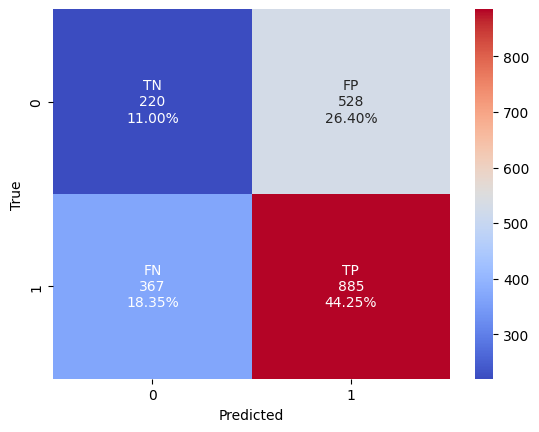

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_TEST,test_pred))
cf_matrix = confusion_matrix(Y_TEST, test_pred)
cf_matrix

group_names = ['TN','FP', 'FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

## Classsfiction Report (분류 리포트)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(Y_TEST, test_pred))

              precision    recall  f1-score   support

           0       0.37      0.29      0.33       748
           1       0.63      0.71      0.66      1252

    accuracy                           0.55      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.53      0.55      0.54      2000



## 중요 변수 확인

In [ ]:
model = xgb.XGBClassifier(learning=0.3, max_depth=5,
                          n_estimators=1000, subsample=0.5, random_state=12)
model.fit(X_TRAIN, Y_TRAIN)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [13:02:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "learning" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning=0.3, learning_rate=None,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# 중요 변수
# xgboost -> feature_importances_
model.feature_importances_

array([0.0777654 , 0.07588019, 0.08044348, 0.08751865, 0.07634173,
       0.07761176, 0.07946841, 0.08080734, 0.07436338, 0.07188088,
       0.06762121, 0.07850786, 0.07178968], dtype=float32)

In [ ]:
feature_imp = pd.DataFrame({
    'features': X_TRAIN.columns,
    'values' : model.feature_importances_,
})

In [ ]:
pd.options.display.float_format = '{:.6f}'.format
feature_imp.head()

,features,values
0,subscription_duration,0.077765
1,recent_login_time,0.075880
2,average_login_time,0.080443
3,average_time_per_learning_session,0.087519
4,monthly_active_learning_days,0.076342


In [ ]:
feature_imp.sort_values(by='values', ascending=False)

,features,values
3,average_time_per_learning_session,0.087519
7,abandoned_learning_sessions,0.080807
2,average_login_time,0.080443
6,recent_learning_achievement,0.079468
11,customer_inquiry_history,0.078508
0,subscription_duration,0.077765
5,total_completed_courses,0.077612
4,monthly_active_learning_days,0.076342
1,recent_login_time,0.075880
8,community_engagement_level,0.074363


<Figure size 10000x20000 with 0 Axes>

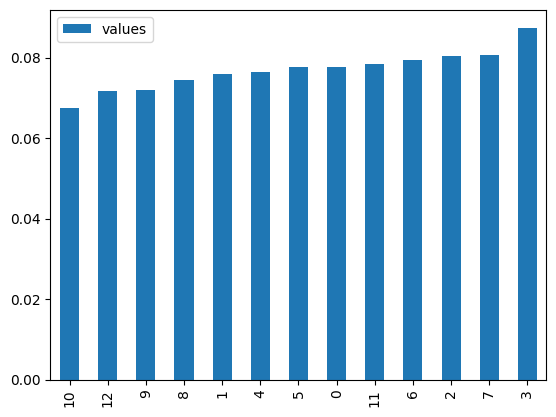

In [ ]:
plt.figure(figsize=(100,200))
feature_imp.sort_values(by='values', ascending=True).plot(kind='bar')
plt.show()

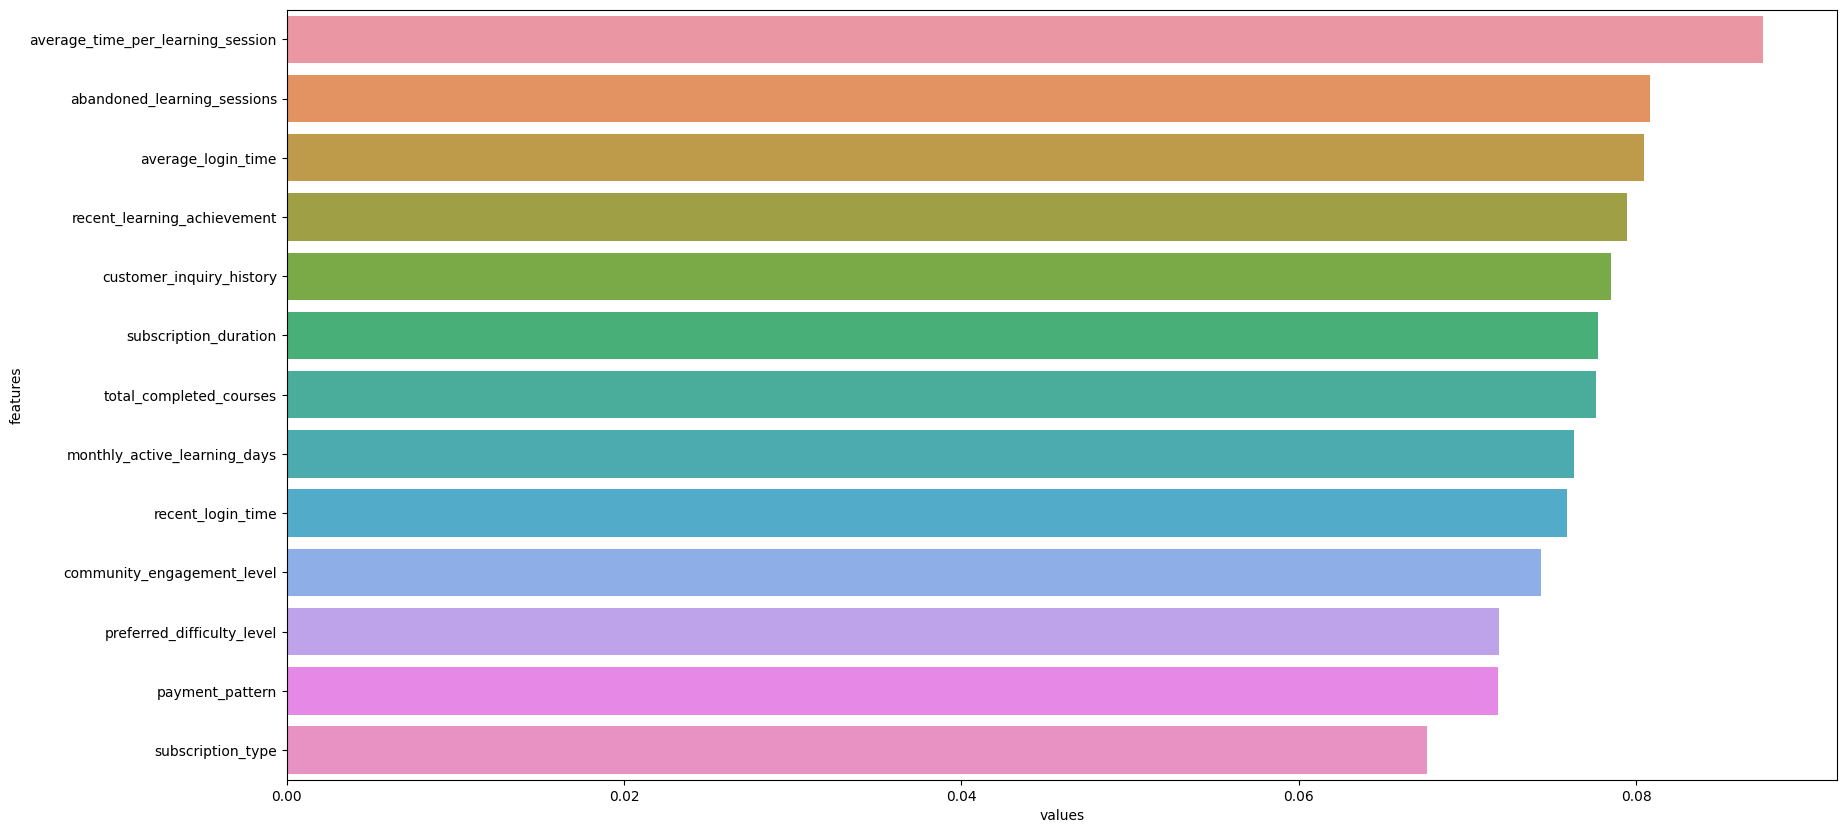

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data= feature_imp.sort_values(by='values', ascending=False))
plt.show()

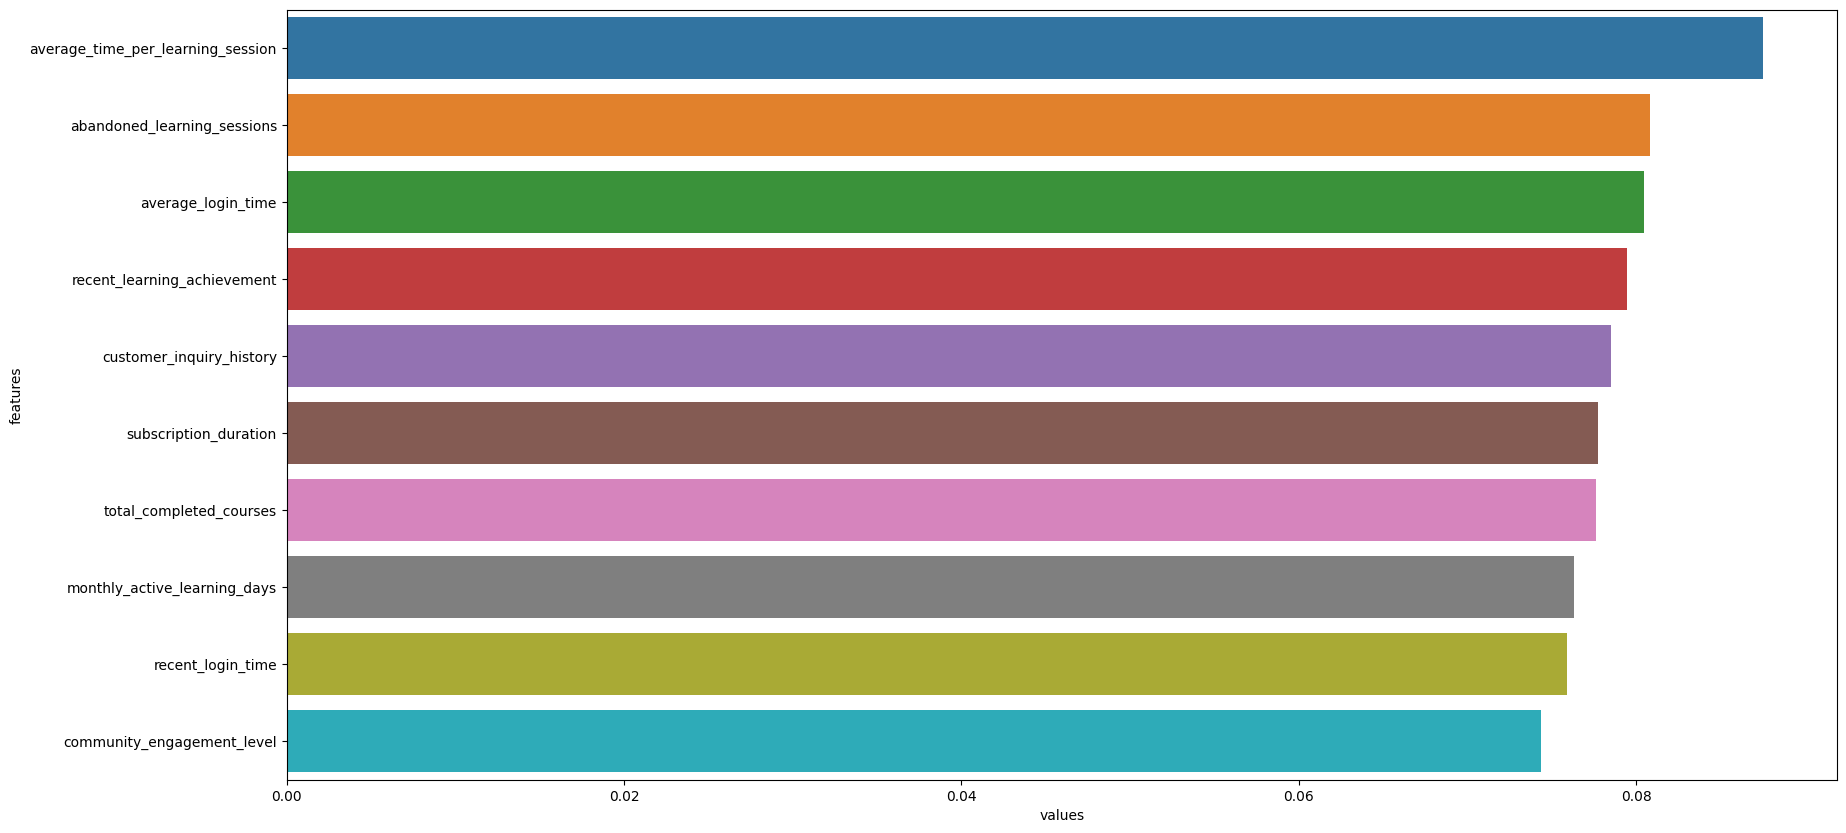

In [ ]:
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data= feature_imp.sort_values(by='values', ascending=False).head(10))
plt.show()
# 상위 10개의 영향도 높은 변수들